In [0]:
spark

In [0]:
import os
import json

# Load kaggle.json (assuming it’s in the '/dbfs/tmp/' directory)
with open('/Workspace/Users/jkope@gmu.edu/kaggle.json', 'r') as f: # replace with your own path
    kaggle_credentials = json.load(f)

# Set the environment variables for authentication
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

# Check if credentials are set correctly
print("Kaggle credentials are set")

Kaggle credentials are set


In [0]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/82.7 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 81.9/82.7 kB 5.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/78.2 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 3.9 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=6f97555df7e0526abbc158e0b118af66a1e56c9e1155b4acb606da0a737cb118
  Stored in directory: /root/.cache/pip/wheels/46/d2/26/84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
!kaggle datasets download -d matt2434/cleaned-ecommerce-data -p /dbfs/tmp/kaggle_data && unzip /dbfs/tmp/kaggle_data/cleaned-ecommerce-data.zip -d /dbfs/tmp/kaggle_data

Dataset URL: https://www.kaggle.com/datasets/matt2434/cleaned-ecommerce-data
License(s): apache-2.0
100%|██████████████████████████████████████▉| 1.65G/1.65G [00:18<00:00, 145MB/s]
100%|██████████████████████████████████████| 1.65G/1.65G [00:18<00:00, 94.0MB/s]
Archive:  /dbfs/tmp/kaggle_data/cleaned-ecommerce-data.zip
  inflating: /dbfs/tmp/kaggle_data/2019-Dec-Cleaned.csv  
  inflating: /dbfs/tmp/kaggle_data/2019-Nov-Cleaned.csv  


In [0]:
nov_path = 'dbfs:/tmp/kaggle_data/2019-Nov-Cleaned.csv'
dec_path = 'dbfs:/tmp/kaggle_data/2019-Dec-Cleaned.csv'

novf = spark.read.csv(nov_path, header=True, inferSchema=True)
decf = spark.read.csv(dec_path, header=True, inferSchema=True)

In [0]:
df = novf.union(decf)

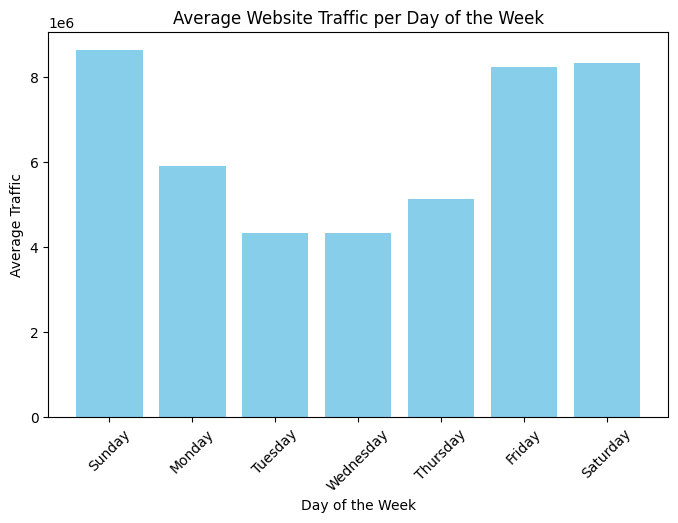

In [0]:
from pyspark.sql.functions import dayofweek, col, count
import pandas as pd
import matplotlib.pyplot as plt

# Extract the day of the week from the timestamp
df = df.withColumn("day_of_week", dayofweek(col("event_time")))

# Group by day_of_week and count the number of events
daily_traffic = df.groupBy("day_of_week").agg(count("*").alias("event_count"))

# Sort the days (Sunday=1, Monday=2, etc.)
daily_traffic = daily_traffic.orderBy("day_of_week")

# Convert to Pandas for plotting
daily_traffic_pd = daily_traffic.toPandas()

# Replace day numbers with day names
day_names = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
daily_traffic_pd["day_of_week"] = daily_traffic_pd["day_of_week"].apply(lambda x: day_names[x - 1])

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(daily_traffic_pd["day_of_week"], daily_traffic_pd["event_count"], color='skyblue')
plt.title("Average Website Traffic per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Traffic")
plt.xticks(rotation=45)
plt.show()


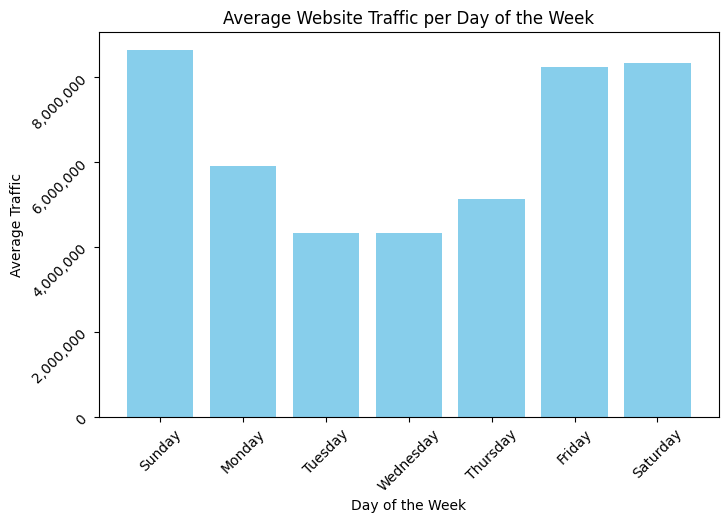

In [0]:
import matplotlib.ticker as ticker

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(daily_traffic_pd["day_of_week"], daily_traffic_pd["event_count"], color='skyblue')
plt.title("Average Website Traffic per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Traffic")

# Format y-axis to show full numbers with commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:,.0f}".format(x)))
plt.yticks(rotation=45)  # Rotate y-axis labels to 45 degrees

plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()